Spearman Correlation [T.CLOSE_OPEN_RATIO] Vs [ PCT_CHANGE ] : 0.946
Pearson Correlation [T.CLOSE_OPEN_RATIO] Vs [ PCT_CHANGE ] : 0.921


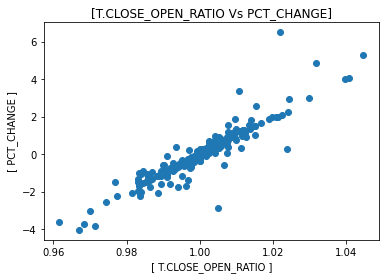

In [2]:
from DataAnalytics import preprocess
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


def Correlation(dict_data, feature_variable, target_variable, b_plot_data):
    feature_vector = []
    target_vector = []

    for key in dict_data:
        if dict_data[key].get(feature_variable) != 0 and dict_data[key].get(target_variable) != 0:
            feature_vector.append(dict_data[key].get(feature_variable))
            target_vector.append(dict_data[key].get(target_variable))

    corr, _ = spearmanr(feature_vector, target_vector)
    print("Spearman Correlation [" + feature_variable + "] Vs [ " + target_variable + " ] : %.3f" % corr)

    pcorr, _ = pearsonr(feature_vector, target_vector)
    print("Pearson Correlation [" + feature_variable + "] Vs [ " + target_variable + " ] : %.3f" % pcorr)

    if b_plot_data:
        title= feature_variable + ' Vs ' + target_variable
        plt.scatter(feature_vector, target_vector)
        plt.title("[%s]" % title)
        plt.xlabel(" [ %s ] " % feature_variable)
        plt.ylabel(" [ %s ] " % target_variable)
        plt.show()


def CreateModel(dataset):
    x = []
    y = []

    for key in dataset:
        row = []

        row.append(dataset[key].get('Open'))
        row.append(dataset[key].get('Close'))

        pct_change = dataset[key].get('PctChg')
        if pct_change >= 0.0:
            y.append(1)
        else:
            y.append(0)

        x.append(row)


data_dict = preprocess('1150_HISTORY_ADJUSTED_2019.xlsx', False)

Correlation(data_dict, "T.CLOSE_OPEN_RATIO", "PCT_CHANGE", True)



